Бесконечных значений нет в данных.
0:	learn: 2.6566630	total: 21.2ms	remaining: 21.2s
100:	learn: 1.1085116	total: 1.63s	remaining: 14.5s
200:	learn: 0.6314421	total: 3.24s	remaining: 12.9s
300:	learn: 0.4036543	total: 4.96s	remaining: 11.5s
400:	learn: 0.2828730	total: 6.64s	remaining: 9.93s
500:	learn: 0.2114603	total: 8.37s	remaining: 8.34s
600:	learn: 0.1649875	total: 10s	remaining: 6.66s
700:	learn: 0.1317312	total: 11.6s	remaining: 4.94s
800:	learn: 0.1092859	total: 13.1s	remaining: 3.27s
900:	learn: 0.0935559	total: 14.8s	remaining: 1.63s
999:	learn: 0.0815472	total: 16.3s	remaining: 0us
Accuracy of the model on the test set: 21.57%


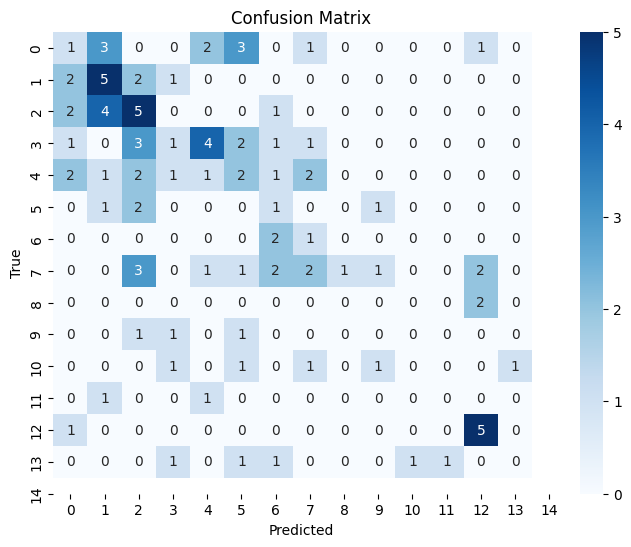

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

# Загрузка данных
data = pd.read_csv(r'D:\Proga\AML\PPG_dataset\dataset_limited.csv') 

# Удаление пропущенных значений
data.dropna(inplace=True)

# Проверка наличия бесконечных значений
if np.any(np.isinf(data.values)):
    print("Найдены бесконечные значения в данных.")
    # Удаление строк с бесконечными значениями
    data = data[np.isfinite(data).all(axis=1)]
    print("Строки с бесконечными значениями удалены.")
else:
    print("Бесконечных значений нет в данных.")

# Выделение признаков и целевой переменной
X = data.drop(['id', 'age_group'], axis=1).values
y = data['age_group'].values - 1 

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Инициализация модели CatBoost
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=100
)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model on the test set: {accuracy * 100:.2f}%')

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(15), yticklabels=np.arange(15))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()